In [78]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (18,8))

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

In [40]:
df = pd.read_excel('Копия data_interval_test(3502).xlsx')
df

,actionGroup,magazin,days,Revenue,# Checks,Qty,Avg Check Size,Avg Check,before days,before Revenue,before # Checks,before Qty,before Avg Check Size,before Avg Check
0,Акция 1,1,16,36987.2800,132,220,1.666667,280.206667,16.0,24969.4400,92.0,150.0,1.6304,271.406957
1,Акция 1,2,16,70944.0428,358,636,1.776536,198.167717,16.0,82326.7109,299.0,473.0,1.5819,275.340170
2,Акция 1,3,16,93335.7800,440,791,1.797727,212.126773,16.0,68219.6800,291.0,411.0,1.4124,234.431890
3,Акция 1,4,16,28390.5000,130,168,1.292308,218.388462,16.0,22224.9300,124.0,139.0,1.1210,179.233306
4,Акция 1,5,16,35707.3400,122,165,1.352459,292.683115,16.0,17469.5100,85.0,106.0,1.2471,205.523647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,Акция 1,441,16,24352.6200,132,197,1.492424,184.489545,16.0,14462.4000,83.0,99.0,1.1928,174.245783
441,Акция 1,442,15,24500.6700,91,141,1.549451,269.238132,16.0,18177.1700,50.0,59.0,1.1800,363.543400
442,Акция 1,443,9,7653.2800,15,24,1.600000,510.218667,7.0,1669.6900,10.0,11.0,1.1000,166.969000
443,Акция 1,444,16,29977.3000,126,154,1.222222,237.915079,15.0,18961.5800,62.0,71.0,1.1452,305.831935


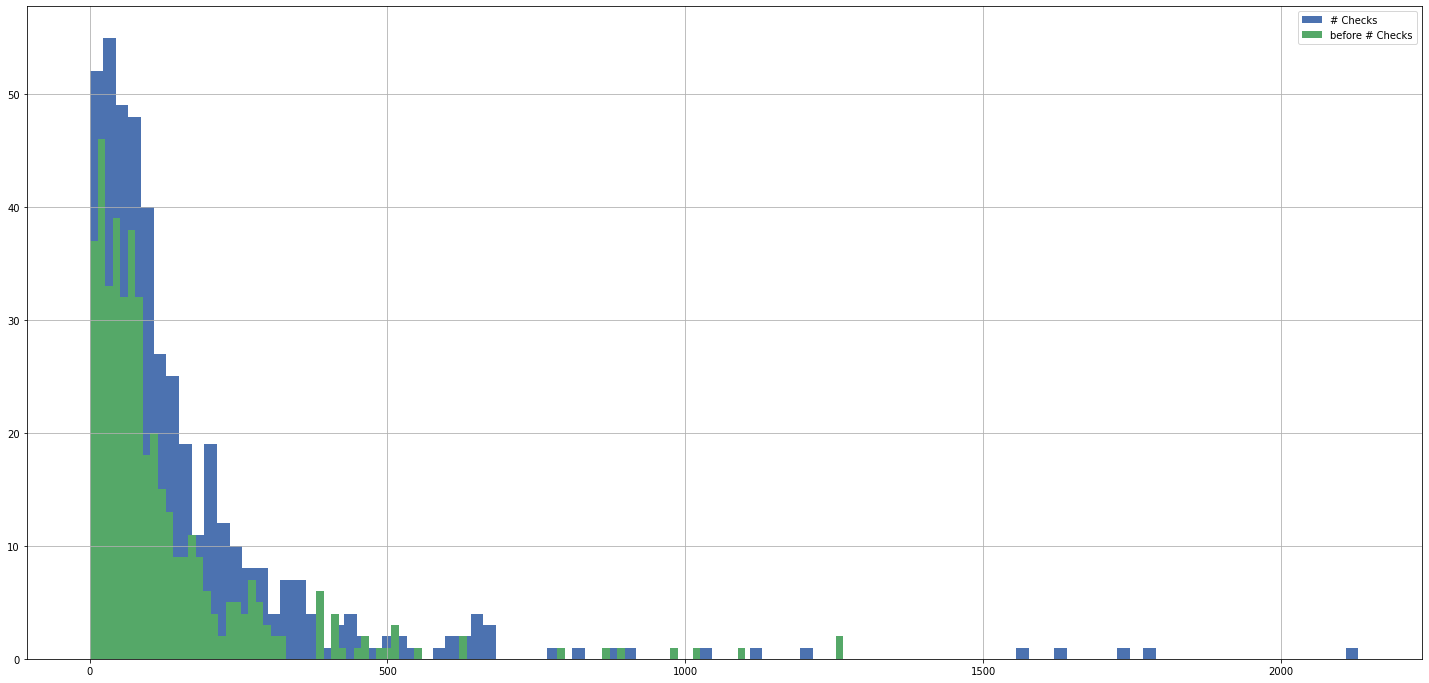

In [3]:
plt.style.use('seaborn-deep')
plt.figure(figsize = (25, 12))
df['# Checks'].hist(bins=100, label = '# Checks')
df['before # Checks'].hist(bins=100, label ='before # Checks')
plt.legend(loc='upper right');

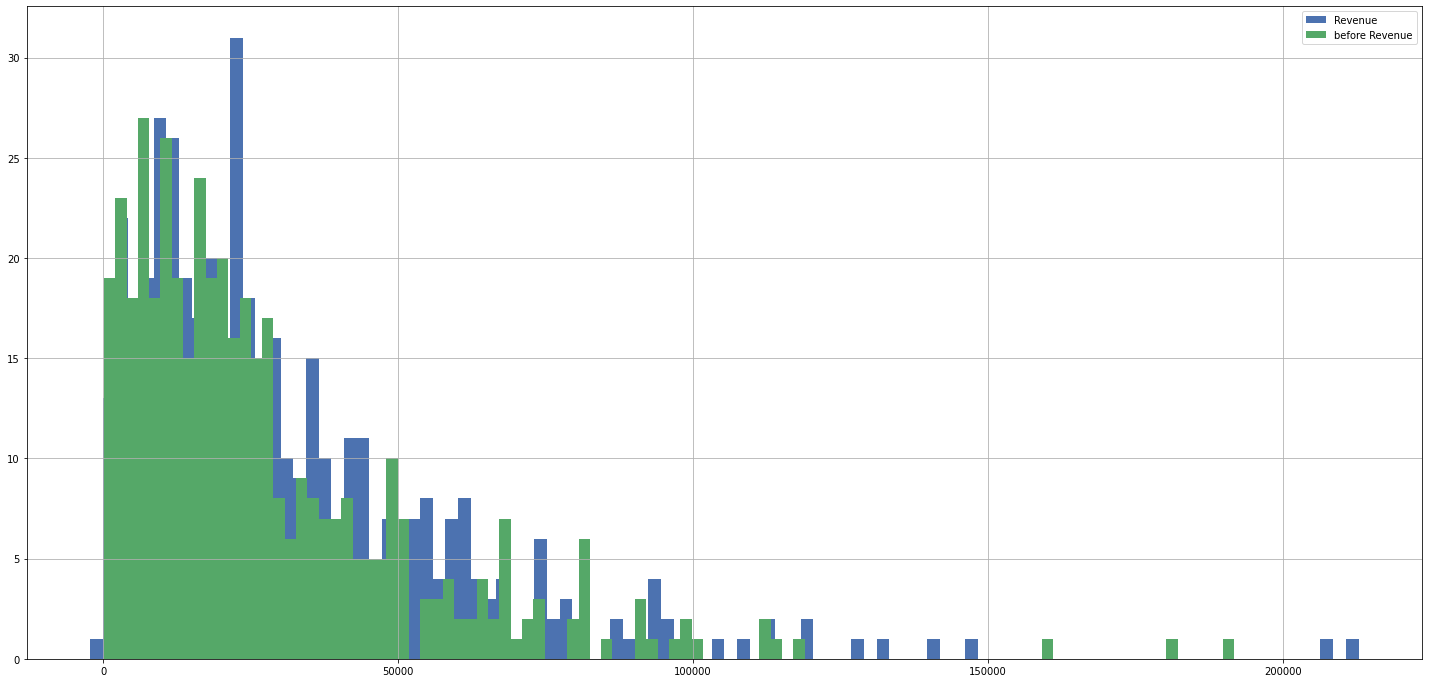

In [4]:
plt.style.use('seaborn-deep')
plt.figure(figsize = (25, 12))
df['Revenue'].hist(bins=100, label ='Revenue')
df['before Revenue'].hist(bins=100, label = 'before Revenue')
plt.legend(loc='upper right');

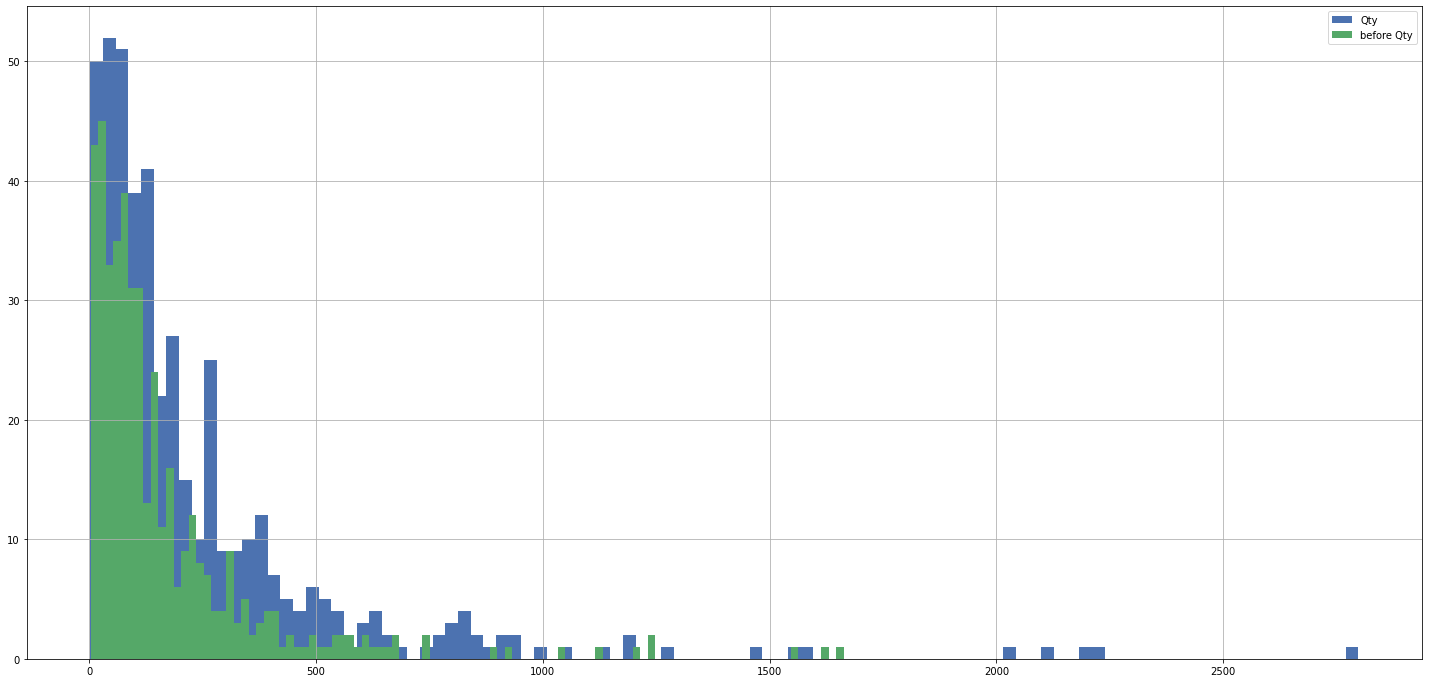

In [5]:
plt.style.use('seaborn-deep')
plt.figure(figsize = (25, 12))
df['Qty'].hist(bins=100, label = 'Qty')
df['before Qty'].hist(bins=100, label ='before Qty')
plt.legend(loc='upper right');

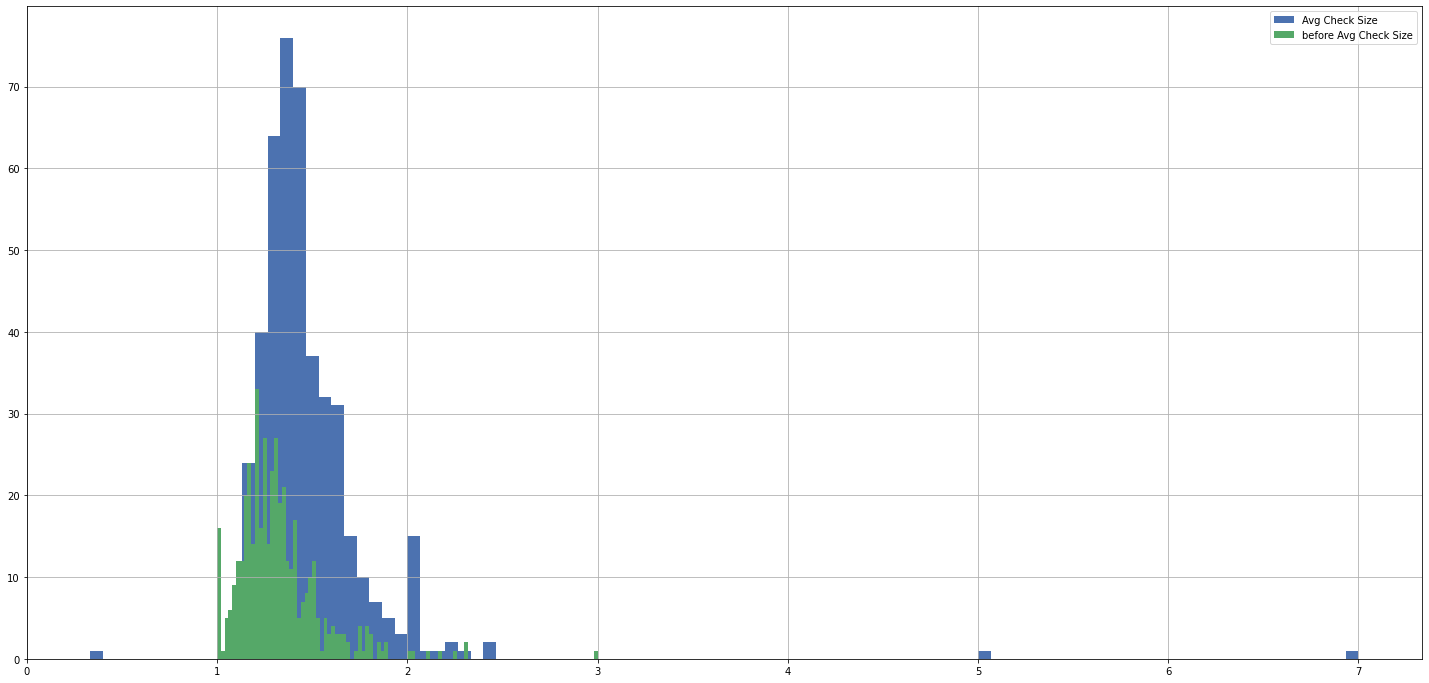

In [6]:
plt.style.use('seaborn-deep')
plt.figure(figsize = (25, 12))
df['Avg Check Size'].hist(bins=100, label = 'Avg Check Size')
df['before Avg Check Size'].hist(bins=100, label ='before Avg Check Size')
plt.legend(loc='upper right');

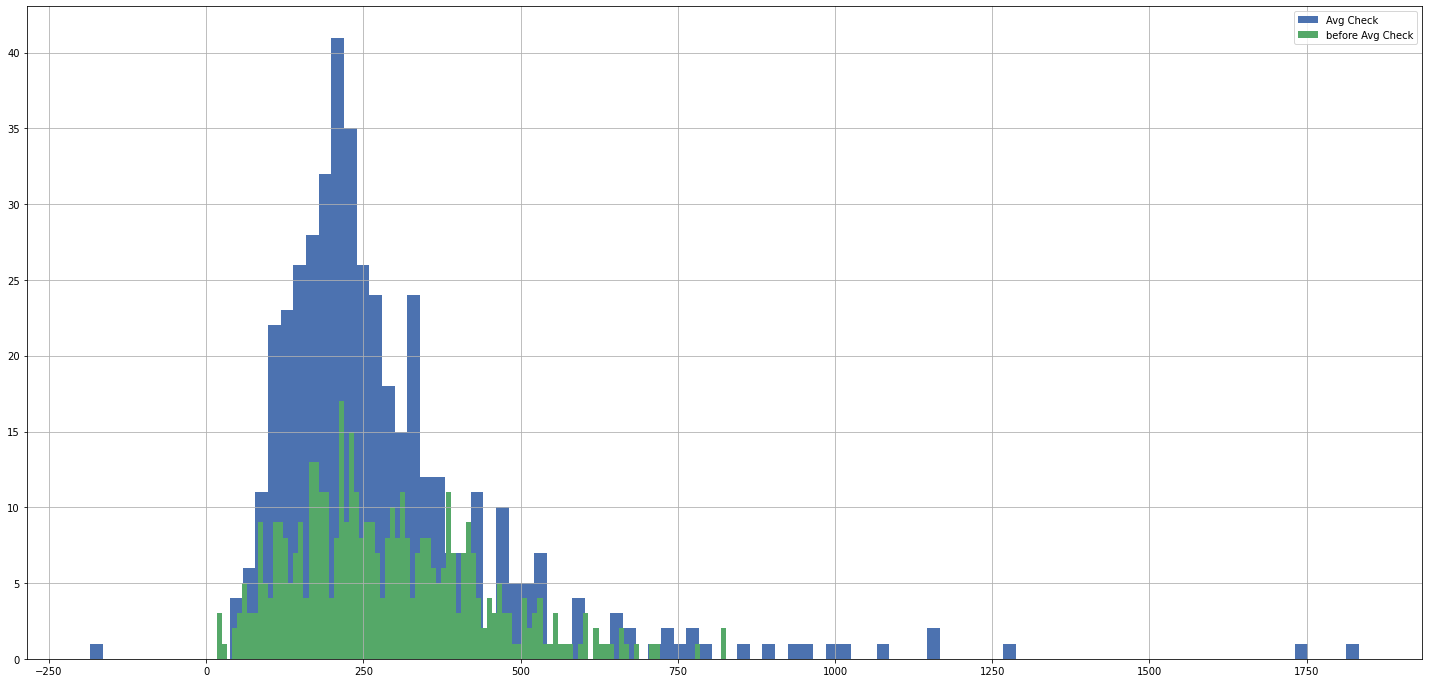

In [7]:
plt.style.use('seaborn-deep')
plt.figure(figsize = (25, 12))
df['Avg Check'].hist(bins=100, label = 'Avg Check')
df['before Avg Check'].hist(bins=100, label ='before Avg Check')
plt.legend(loc='upper right');

In [8]:
def confidence_interval(data, alpha = 0.05):
    se = np.sqrt(np.mean(data)/data.shape[0])
    
    q = stats.norm.ppf(1 - alpha/2)

    upper = np.mean(data) + q*se
    low = np.mean(data) - q*se
    
    return upper, low

In [56]:
def confidence_interval_difference(data1, data2, alpha=0.05):
    se1_sq = np.mean(data1)/data1.shape[0]
    se2_sq = np.mean(data2)/data2.shape[0]
    
    q = stats.norm.ppf(1 - alpha/2)
    upper_interval_diff = (np.mean(data1)-np.mean(data2)) + q*np.sqrt(se1_sq+se2_sq)
    low_interval_diff = (np.mean(data1)-np.mean(data2)) - q*np.sqrt(se1_sq+se2_sq)
    
    return upper_interval_diff, low_interval_diff
    

In [29]:
index = list(df.columns)
intervals = pd.DataFrame(index = index,
                         columns = ('upper', 'lower'))

In [69]:
metrics = index[:5]
diff_interval =  pd.DataFrame(index = metrics,
                         columns = ('upper difference interval with before', 'lower difference interval with before'))

In [41]:
df = df.drop(['actionGroup', 'magazin', 'days', 'before days'], axis=1)

In [32]:
upper = []
lower = []
for i in range(len(index)):
    upper.append(round(confidence_interval(df[metrics[i]])[0], 3))
    lower.append(round(confidence_interval(df[metrics[i]])[1], 3))
intervals['upper'] = upper
intervals['lower'] = lower
    

In [34]:
intervals.T

,Revenue,# Checks,Qty,Avg Check Size,Avg Check,before Revenue,before # Checks,before Qty,before Avg Check Size,before Avg Check
upper,31893.207,171.178,245.686,1.587,290.443,27612.801,126.387,169.589,1.432,286.367
lower,31860.030,168.755,242.782,1.361,287.284,27581.932,124.306,167.177,1.218,283.231


In [70]:
dif_upper = []
dif_lower = []
for i in range(len(metrics)):
    dif_upper.append(round(confidence_interval_difference(df[index[i]], df[index[i+5]])[0], 3))
    dif_lower.append(round(confidence_interval_difference(df[index[i]], df[index[i+5]])[1], 3))
diff_interval['upper difference interval with before'] = dif_upper
diff_interval['lower difference interval with before'] = dif_lower

In [71]:
diff_interval

,upper difference interval with before,lower difference interval with before
Revenue,4301.910,4256.593
# Checks,46.217,43.023
Qty,77.738,73.963
Avg Check Size,0.305,-0.006
Avg Check,6.290,1.840


Вывод: Врезультате А/В тестирования наблюдаются значимые изменения метрик Revenue, Checks, Qty, Avg Check, так как доверительный интервал с уровнем значимсти 0.05 для разности средних не включает 0, и с вероятнотью 0.95 изменение этих отличное от нуля. 
       Изменение метрики Avg Check Sizе не имеет статистически значимых изменений, так как доверительный интервал с уровнем значимсти 0.05 для разности средних не включает 0